In [11]:
#pip install torch torchvision transformers datasets pillow matplotlib scikit-learn

In [12]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
dataset = load_dataset("jonathan-roberts1/AID_MultiLabel")
print(dataset)
print(f"Number of Rows(sample size): {dataset['train'].num_rows},\nNumber of Columns(image + label(s)): {dataset['train'].num_columns}"),
# For each sample, there are 2 fields; columns(image + label(s)) and rows(sample number):
# 2 column/field for each sample-> PIL image (600 * 600) and
#                        -> multi vector showing which labels are present like list[int]
#So there are 3000 explicitly labeled training samples containing AT LEAST one label(y)


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3000
    })
})
Number of Rows(sample size): 3000,
Number of Columns(image + label(s)): 2


(None,)

In [13]:
print(f"FEATURES: {dataset['train'].features}\n")
print(f"First sample in the dataset as an example: {dataset['train'][0],len(dataset['train']["label"][0])}")
class_names = dataset['train'].features['label'].feature.names
num_classes = len(class_names)

print("CLASSES: ", class_names)
print("NUMBER OF CLASSES: ", num_classes)

FEATURES: {'image': Image(mode=None, decode=True), 'label': List(ClassLabel(names=['airplane', 'bare soil', 'buildings', 'cars', 'chaparral', 'court', 'dock', 'field', 'grass', 'mobile home', 'pavement', 'sand', 'sea', 'ship', 'tanks', 'trees', 'water']))}

First sample in the dataset as an example: ({'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x600 at 0x237CDC14770>, 'label': [0, 1, 2, 3, 8, 10]}, 6)
CLASSES:  ['airplane', 'bare soil', 'buildings', 'cars', 'chaparral', 'court', 'dock', 'field', 'grass', 'mobile home', 'pavement', 'sand', 'sea', 'ship', 'tanks', 'trees', 'water']
NUMBER OF CLASSES:  17


In [14]:
#It handles vector inside of column of each samples
def to_multihot(label_indices, num_classes):
    vec = np.zeros(num_classes, dtype=np.float32)
    vec[label_indices] = 1.0
    return vec
images = dataset['train']['image']
raw_labels = dataset['train']['label']

labels = [to_multihot(lbl, num_classes) for lbl in raw_labels]


In [15]:
def is_single_label(label_vector):
    return sum(label_vector) == 1

def is_multi_label(label_vector):
    return sum(label_vector) >= 2

images = dataset['train']['image']
labels = dataset['train']['label']

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    images, labels, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)



Number of classes: 17
Class names: ['airplane', 'bare soil', 'buildings', 'cars', 'chaparral', 'court', 'dock', 'field', 'grass', 'mobile home', 'pavement', 'sand', 'sea', 'ship', 'tanks', 'trees', 'water']
Missing classes (no example found): []


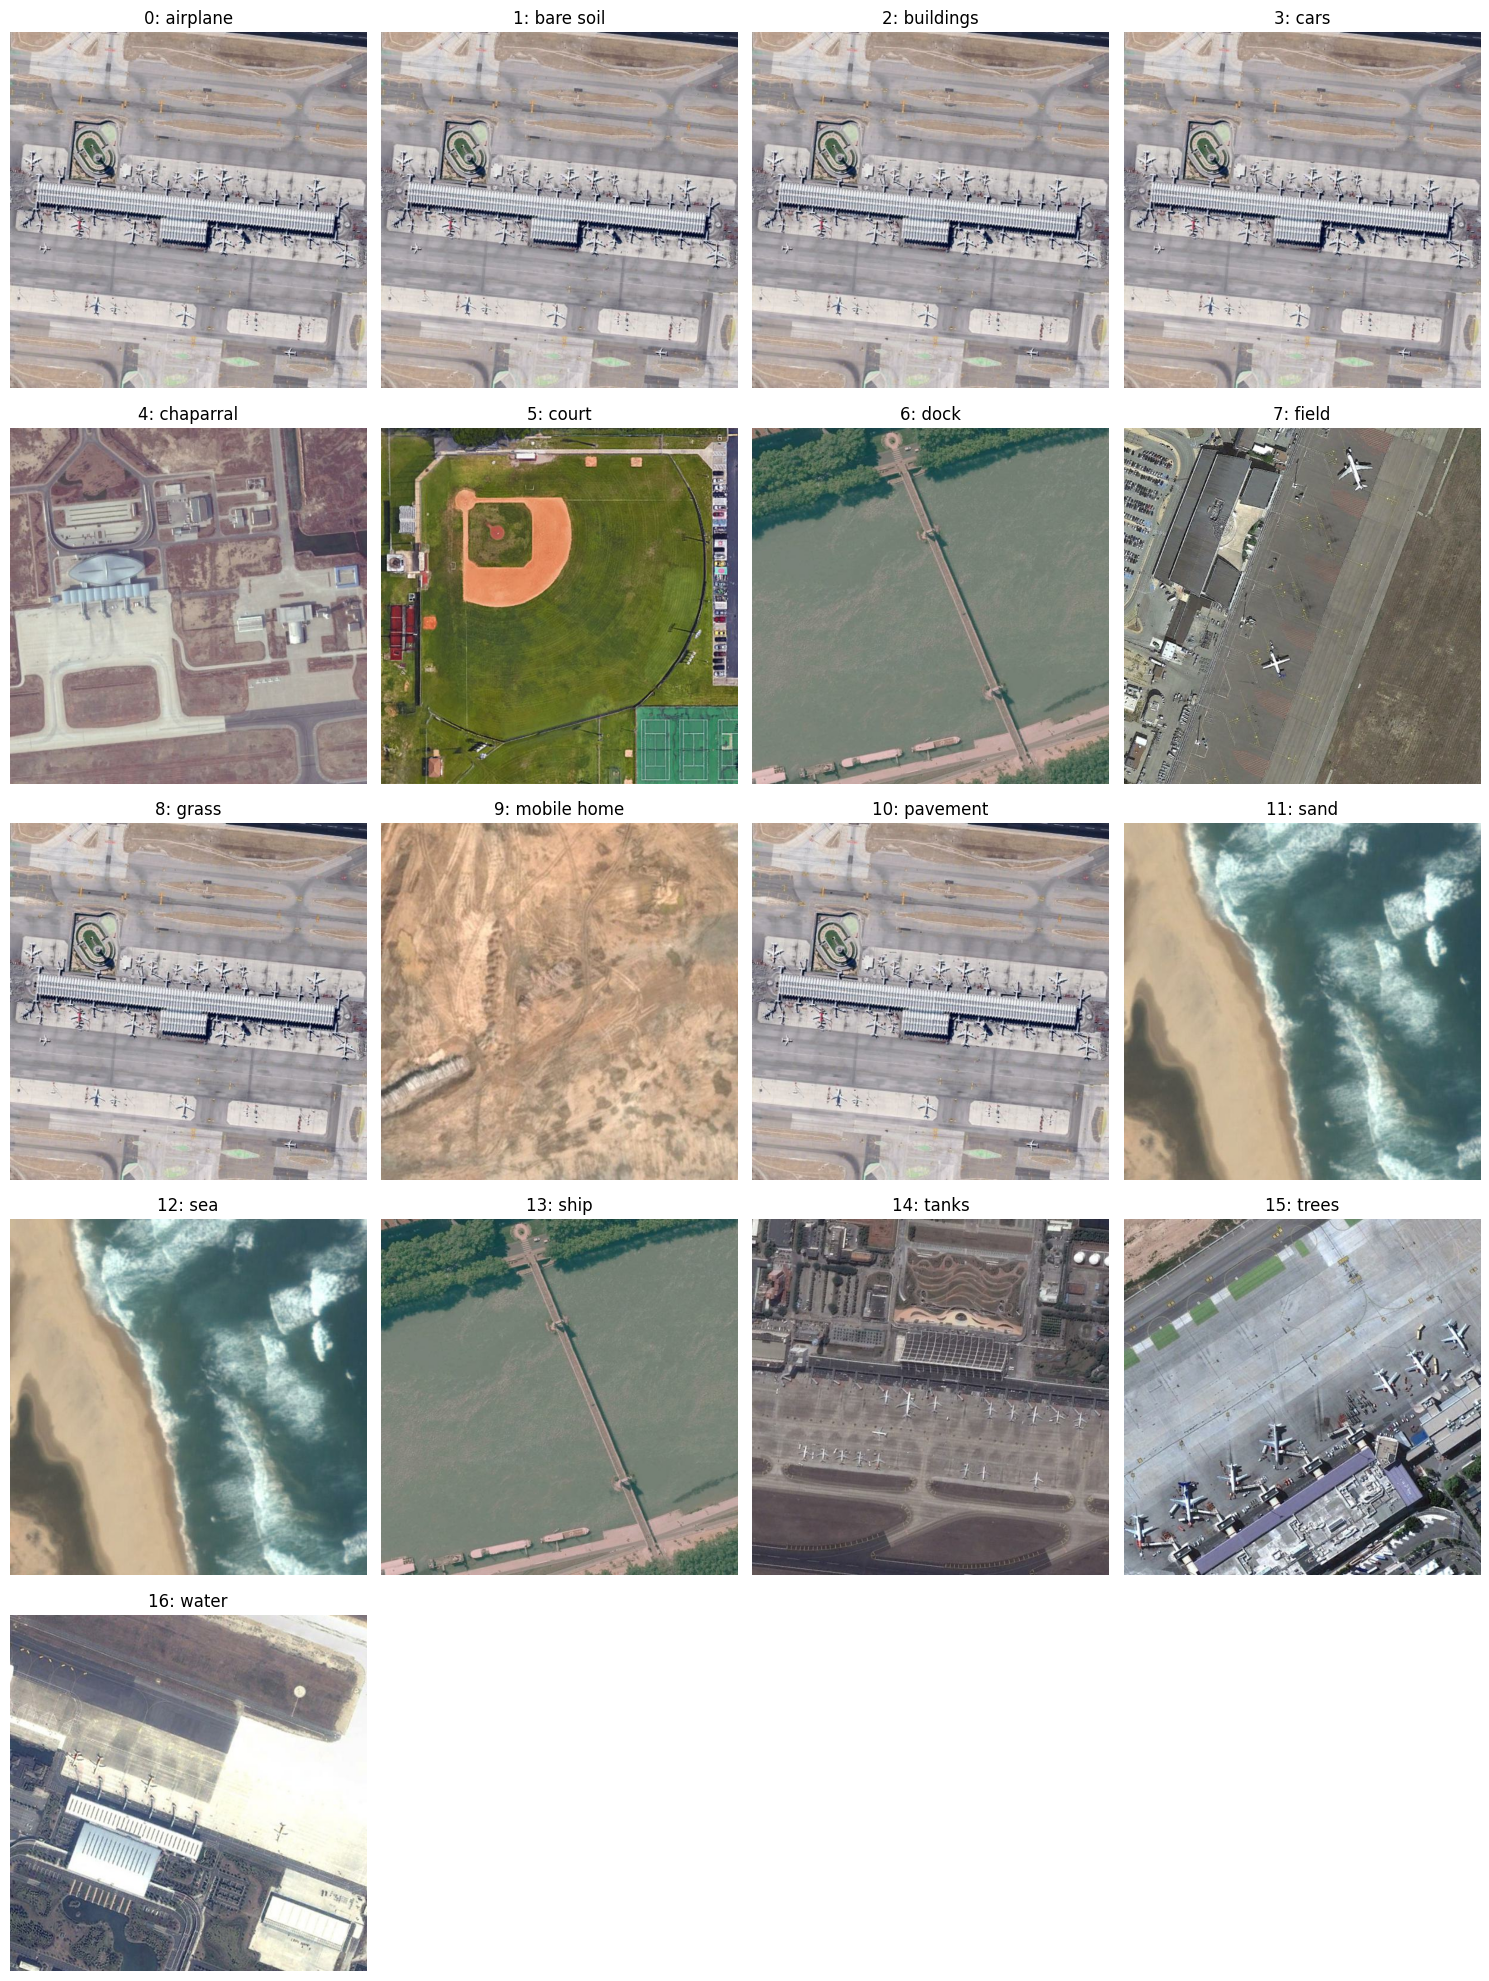

In [16]:
import matplotlib.pyplot as plt

images = dataset['train']['image']
labels = dataset['train']['label']

# Get class names & number of classes from metadata
label_feature = dataset['train'].features['label'].feature
class_names = label_feature.names
num_classes = len(class_names)

print("Number of classes:", num_classes)
print("Class names:", class_names)

# store one example per class
examples = [None] * num_classes

for img, lbl in zip(images, labels):
    for cls in lbl:  # lbl is a list of class indices
        if 0 <= cls < num_classes:          # safety check
            if examples[cls] is None:
                examples[cls] = img
    if all(x is not None for x in examples):
        break

missing = [i for i, x in enumerate(examples) if x is None]
print("Missing classes (no example found):", missing)

# visualize found classes
valid_indices = [i for i, x in enumerate(examples) if x is not None]

rows = (len(valid_indices) // 4) + 1
plt.figure(figsize=(15, rows * 4))

for plot_i, cls_idx in enumerate(valid_indices):
    plt.subplot(rows, 4, plot_i + 1)
    plt.imshow(examples[cls_idx])
    plt.axis("off")
    title = f"{cls_idx}: {class_names[cls_idx]}"
    plt.title(title)

plt.tight_layout()
plt.show()


Number of classes: 17
First image labels [0, 1, 2, 3, 8, 10]
All Classes: ['airplane', 'bare soil', 'buildings', 'cars', 'chaparral', 'court', 'dock', 'field', 'grass', 'mobile home', 'pavement', 'sand', 'sea', 'ship', 'tanks', 'trees', 'water']
Missing classes (if any): []


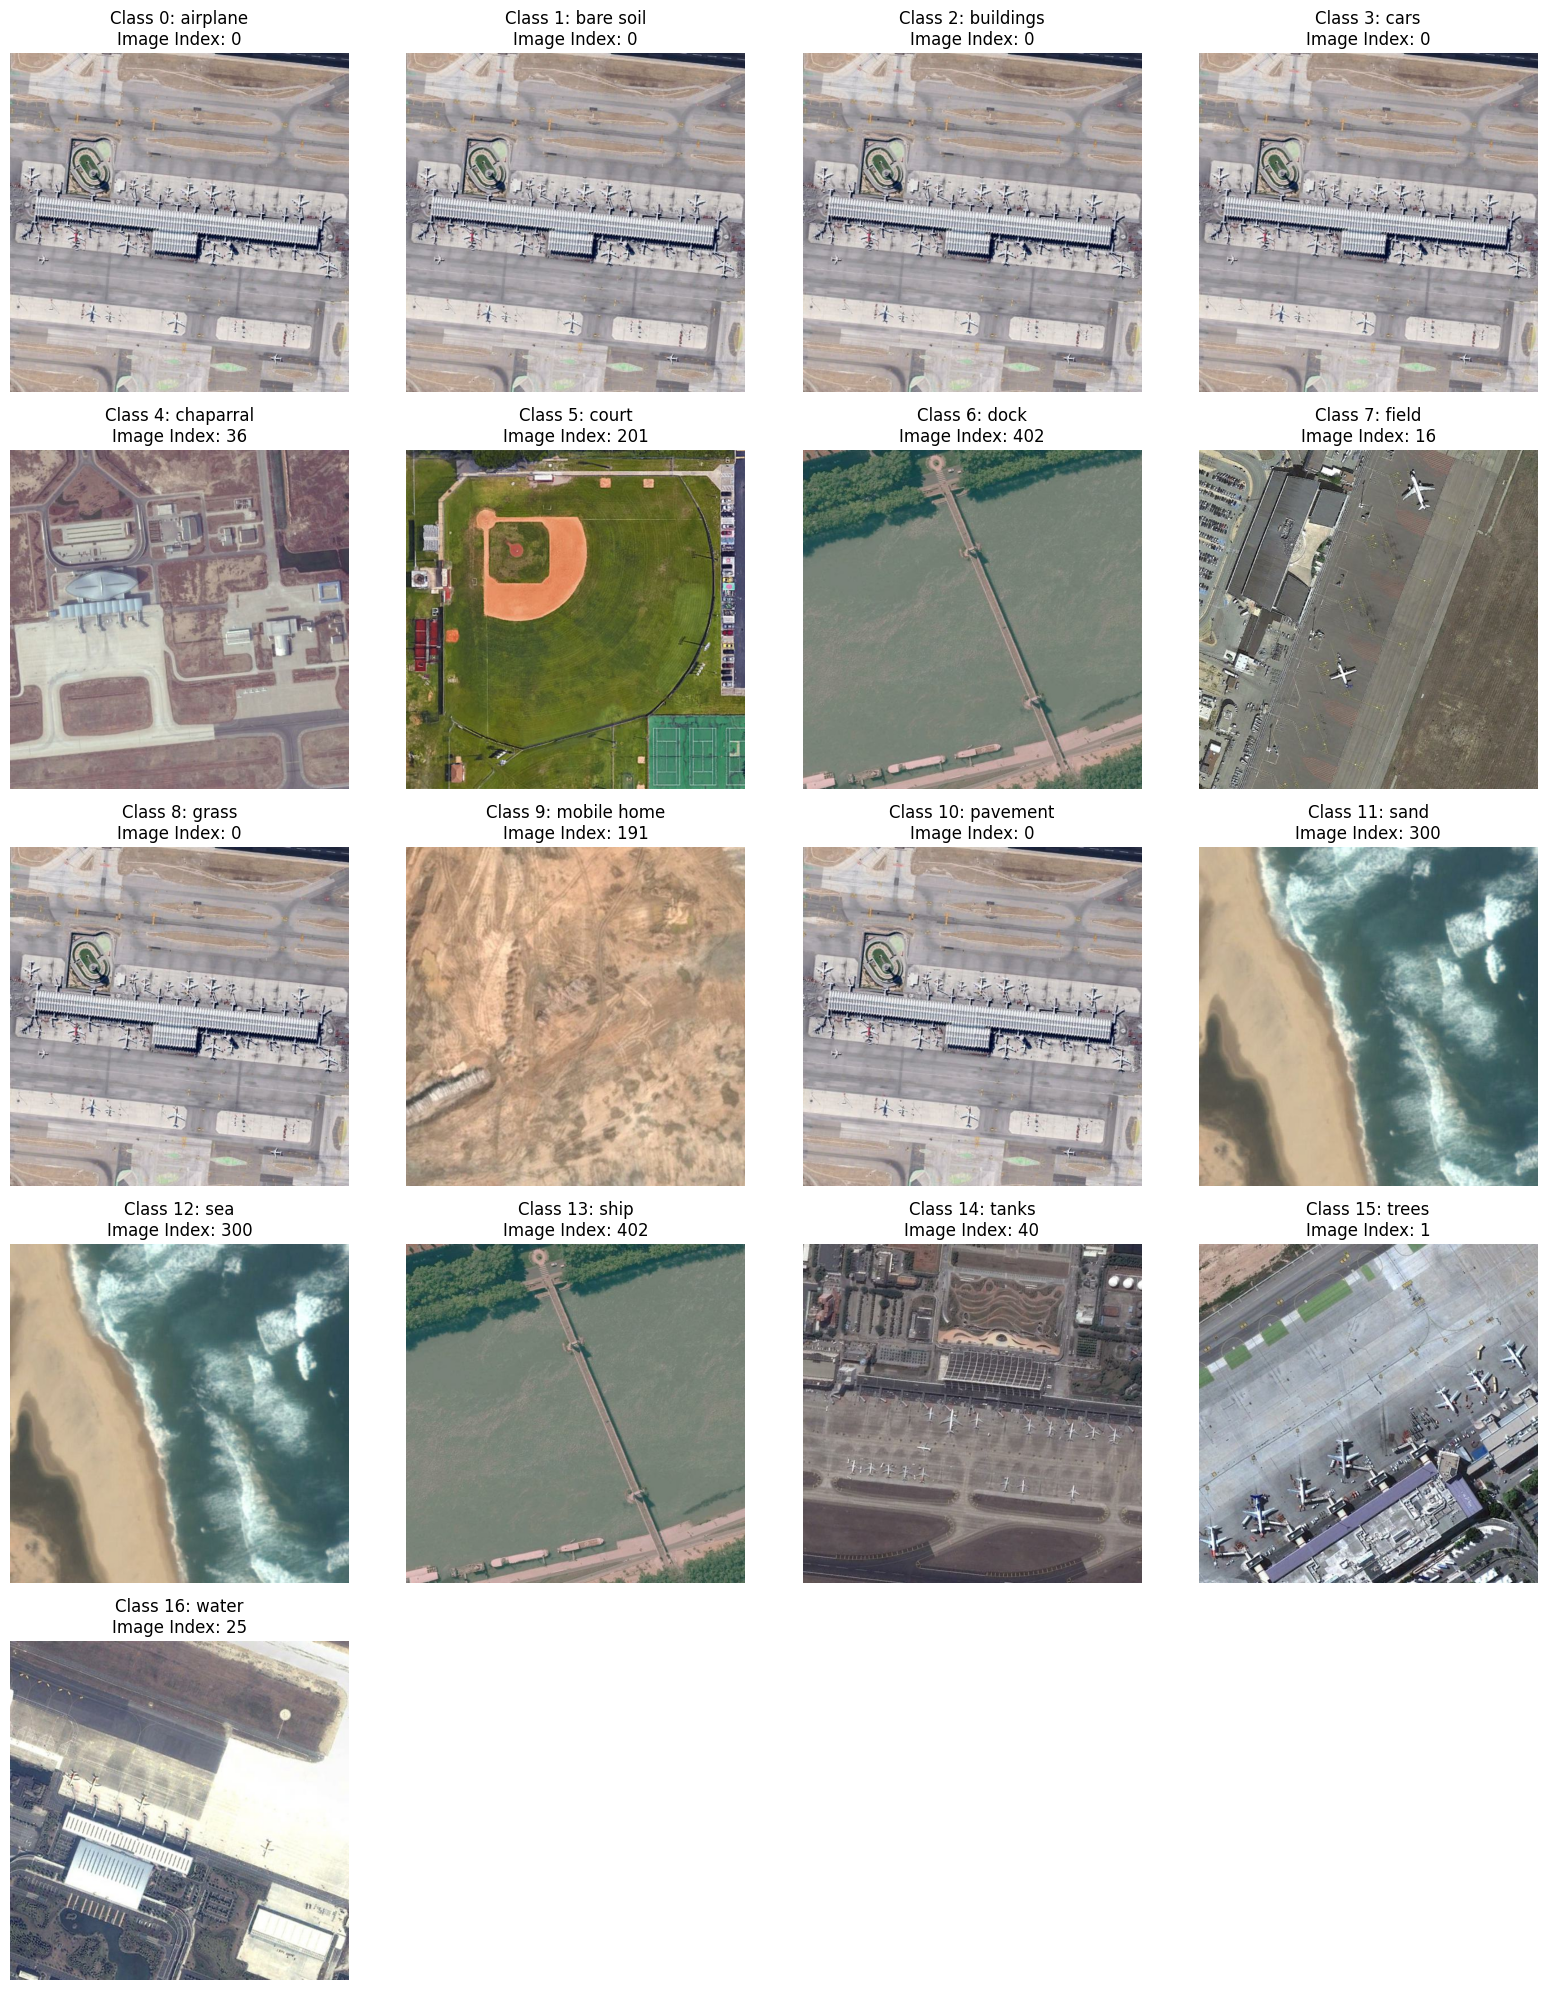

In [17]:
import matplotlib.pyplot as plt

images = dataset['train']['image']
labels = dataset['train']['label']

# Extract class names from HuggingFace metadata
label_feature = dataset['train'].features['label'].feature
class_names = label_feature.names
num_classes = len(class_names)

print("Number of classes:", num_classes)
print(f"First image labels {dataset['train']['label'][0]}")
print(f"All Classes: {class_names}")
# Store (image, dataset_index) per class
examples = [None] * num_classes

for idx, (img, lbl) in enumerate(zip(images, labels)):
    for cls in lbl:  # lbl is a list of class indices
        if 0 <= cls < num_classes:
            if examples[cls] is None:
                examples[cls] = (img, idx)
    if all(x is not None for x in examples):
        break

# Identify missing classes (just in case)
missing = [i for i, x in enumerate(examples) if x is None]
print("Missing classes (if any):", missing)

# Visualize
valid_indices = [i for i in range(num_classes) if examples[i] is not None]

rows = (len(valid_indices) // 4) + 1
plt.figure(figsize=(16, rows * 4))

for plot_i, cls_idx in enumerate(valid_indices):
    img, img_index = examples[cls_idx]

    plt.subplot(rows, 4, plot_i + 1)
    plt.imshow(img)
    plt.axis("off")

    title = f"Class {cls_idx}: {class_names[cls_idx]}\nImage Index: {img_index}"
    plt.title(title)

plt.tight_layout()
plt.show()


In [10]:
#It prints all unique vectors' image: approximately: 300 images

"""all_labels = dataset['train']['label']
unique_vectors = {}

for img, lbl in zip(dataset['train']['image'], all_labels):
    tup = tuple(lbl)  # lists are not hashable, convert to tuple
    if tup not in unique_vectors:
        unique_vectors[tup] = img

print(f"Total unique label vectors: {len(unique_vectors)}")


# Visualize each unique vector with one sample image
rows = (len(unique_vectors) // 3) + 1
plt.figure(figsize=(14, rows * 4))

for i, (vec, img) in enumerate(unique_vectors.items()):
    plt.subplot(rows, 3, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(str(vec))

plt.tight_layout()
plt.show()"""


'all_labels = dataset[\'train\'][\'label\']\nunique_vectors = {}\n\nfor img, lbl in zip(dataset[\'train\'][\'image\'], all_labels):\n    tup = tuple(lbl)  # lists are not hashable, convert to tuple\n    if tup not in unique_vectors:\n        unique_vectors[tup] = img\n\nprint(f"Total unique label vectors: {len(unique_vectors)}")\n\n\n# Visualize each unique vector with one sample image\nrows = (len(unique_vectors) // 3) + 1\nplt.figure(figsize=(14, rows * 4))\n\nfor i, (vec, img) in enumerate(unique_vectors.items()):\n    plt.subplot(rows, 3, i+1)\n    plt.imshow(img)\n    plt.axis("off")\n    plt.title(str(vec))\n\nplt.tight_layout()\nplt.show()'